<a href="https://colab.research.google.com/github/amannraawat/learning-ml-hands-on/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 2 End-to-end Machine Learning project**



### Setup the Data

In [33]:
# import necessary libraries
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# function for decompressing the tarball data
# when function is called it looks for tgz file and if not there if creates a directory which contains the tgz file downloaded from the url we provided
def load_housing_data():
  tarball_path = Path("drive/MyDrive/Hands-On Machine Learning/housing.tgz")
  if not tarball_path.is_file():
    Path("drive/MyDrive/Hands-On Machine Learning/datasets").mkdir(parents=True, exist_ok=True)
    url = "https://raw.githubusercontent.com/amannraawat/learning-ml-hands-on/main/files/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)

    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="drive/MyDrive/Hands-On Machine Learning/datasets")

  csv_path = Path("drive/MyDrive/Hands-On Machine Learning/datasets/housing/housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()

### Quick Look at the Data

In [3]:
# head method selects the top five rows from the dataset specified
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# info method gives the quick description of the data, in particular the total number of rows , each attribute's type and number of non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# value_counts function gives the each category's count in a specific column
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
# describ shows summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
# codes to save the figures as PNGs

images_path = Path("drive/MyDrive/Hands-On Machine Learning") / "images" / "end_to_end_project"
images_path.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = images_path / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [35]:
import matplotlib.pyplot as plt

# hist method plots a histogram for each numerical attribute in the whole dataset
# housing.hist(bins=50, figsize=(12,10))
# save_fig("attribute_histogram_plots")
# plt.show()

### Create a Test Set

In [36]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


In [37]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


In [38]:
# to ensure notebook's output remains same every time we run it
np.random.seed(42)

In [39]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2 **32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [40]:
housing_with_ids = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_ids, 0.2, "index")

In [41]:
housing_with_ids['id'] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_ids, 0.2, "id")

In [42]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
test_set['total_bedrooms'].isnull().sum()

44

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [43]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485-1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


In [44]:
np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [45]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                 bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels=[1,2,3,4,5])

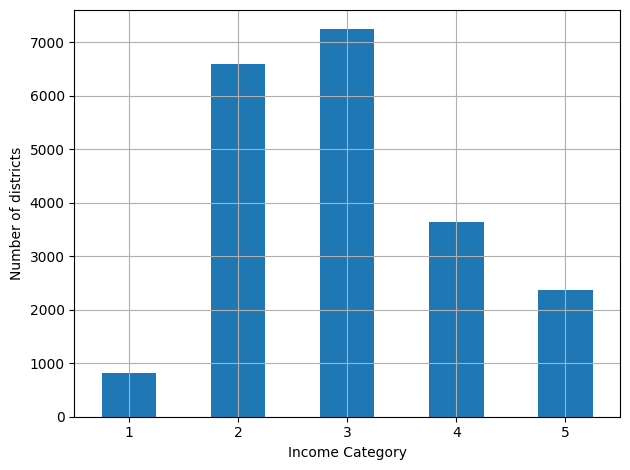

In [14]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
# save_fig("housing_income_cat_bar_plot")
plt.show()

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.loc[train_index]
  strat_test_set_n = housing.loc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])



In [47]:
strat_train_set, strat_test_set = strat_splits[0]

In [48]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [49]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [50]:
def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set)
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] -1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] -1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [51]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

### Visualize the Data to Gain Insights

In [19]:
housing = strat_train_set.copy()

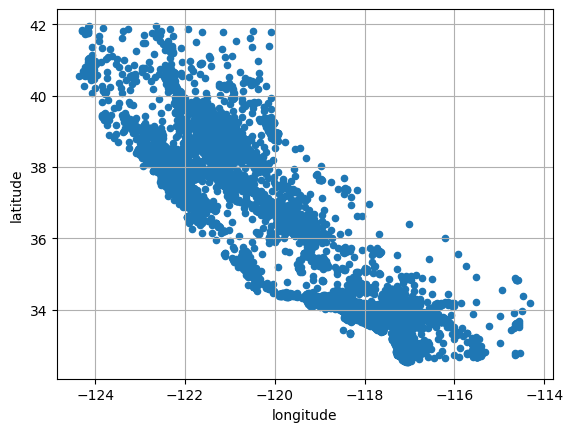

In [52]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
# save_fig("bad_visualization_plot")
plt.show()

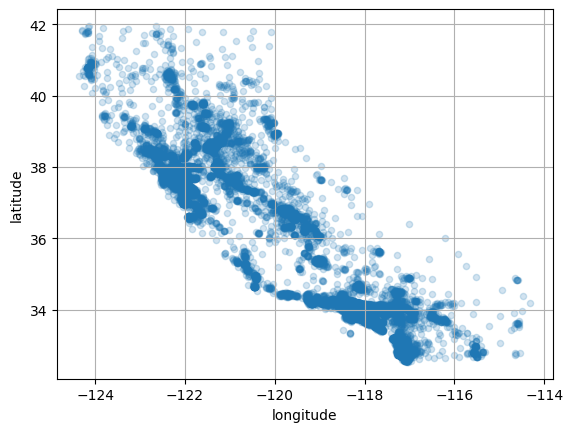

In [53]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
# save_fig("better_visualization_plot")
plt.show()

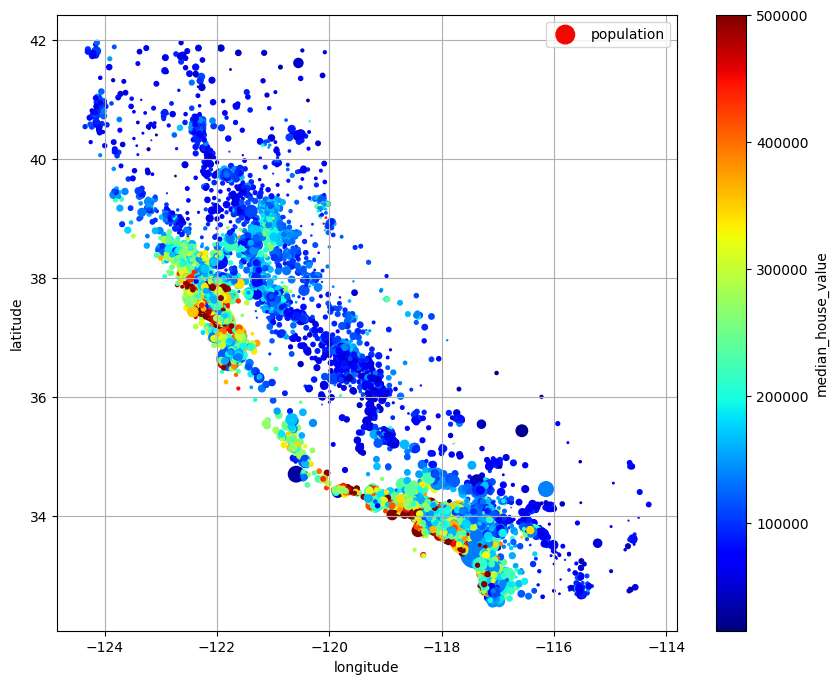

In [54]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet",
             colorbar=True, legend=True, figsize=(10,8))
# save_fig("housig_price_scatterplot")
plt.show()

_Corelations with the Label Value_

In [55]:
corr_matrix = housing.corr(numeric_only=True)

In [56]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


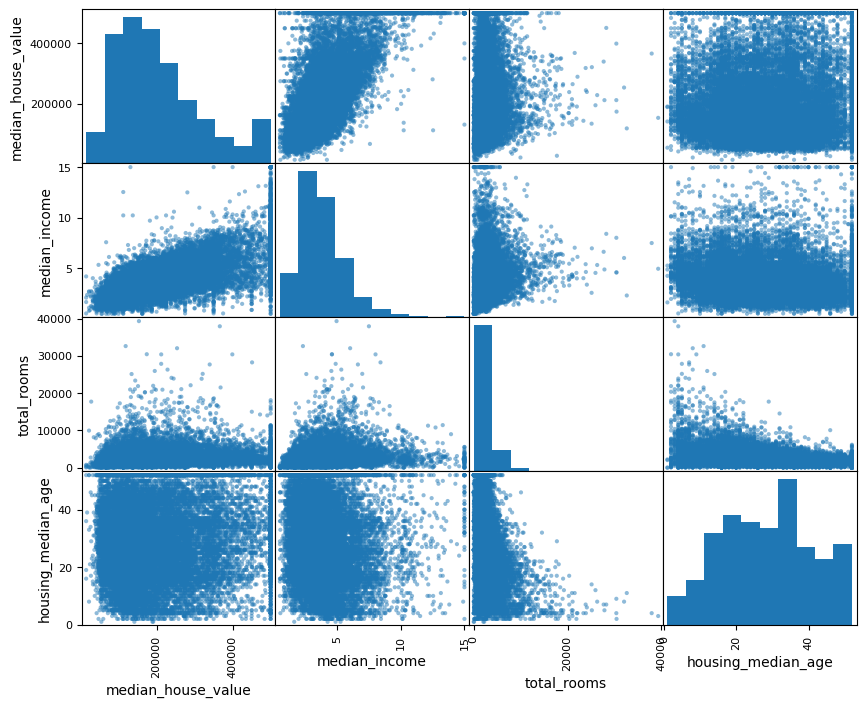

In [57]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(10,8))
# save_fig("scatter_matrix_plot")
plt.show()

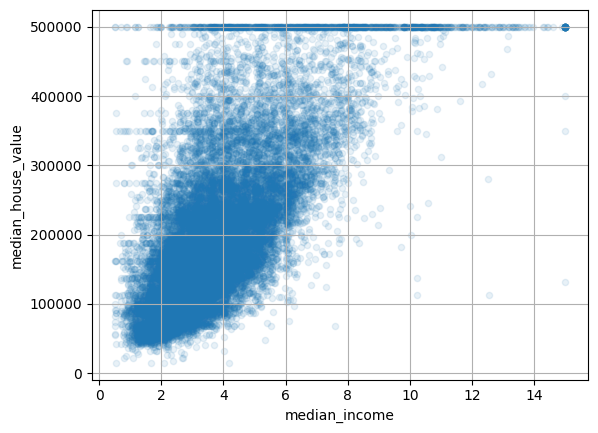

In [58]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
# save_fig("income_vs_house_value_scatterlot")
plt.show()

_Experimenting with Attribute Combinations_

In [59]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [60]:
coor_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160
